# 🦾 **Regularización en Machine Learning** 🦾

# ¿Qué es la regularización? 🤔

La regularización es una técnica en Machine Learning que ayuda a prevenir el sobreajuste (overfitting) al agregar una penalización a la función de pérdida. Esto favorece modelos más simples y generalizables.

## *Tipos de regularización:*

### a) L1 (Lasso) 🏀

    Añade una penalización proporcional al valor absoluto de los coeficientes.
    Tiende a crear modelos dispersos, con muchos coeficientes iguales a cero.
    Útil para selección de variables (feature selection).
    Función de penalización: α ∑|wi|



### b) L2 (Ridge o crésta) 🌊

    Añade una penalización proporcional al cuadrado de los coeficientes.
    No elimina completamente las variables, sino que reduce su importancia.
    Útil para reducir la multicolinealidad y evitar coeficientes extremadamente grandes.
    Función de penalización: α ∑(wi^2)


### c) Elastic Net 🥅

    Combina L1 y L2, lo que permite la selección de variables y la reducción de multicolinealidad.
    Función de penalización: α1 ∑|wi| + α2 ∑(wi^2)


El parámetro de regularización utilizado es **α (Alpha)**, el factor de regularización que controla el grado de penalización. Un valor mayor implica una mayor penalización y, por lo tanto, un modelo más simple. **A mayor valor de alpha, mayor penalización, modelo más simple**


**¿En que modelos y técnicas se regulariza?**

¡Pues en la regresión lineal! (Recuerda... --> sklearn.linear_model)

    - Regresión Lasso
    - Regresión Ridge
    - Regresión Elastic Net

Tambien se utiliza en redes neuronales, SVMs (Máquinas de Vectores de Soporte), Árboles de decisión... pero esto no ocupa ahora.

**Otro factor fundamental es la validación cruzada (Cross-Validation)**

    Nos sirve para seleccionar el valor óptimo del parámetro de regularización y evaluar la capacidad de generalización del modelo. La validación cruzada divide los datos en diferentes conjuntos (k-folds) y entrena y evalúa el modelo en cada combinación de conjuntos.

## Vamos a ver un ejemplo sobre cada tipo de regularización:

c:\Users\Carre\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

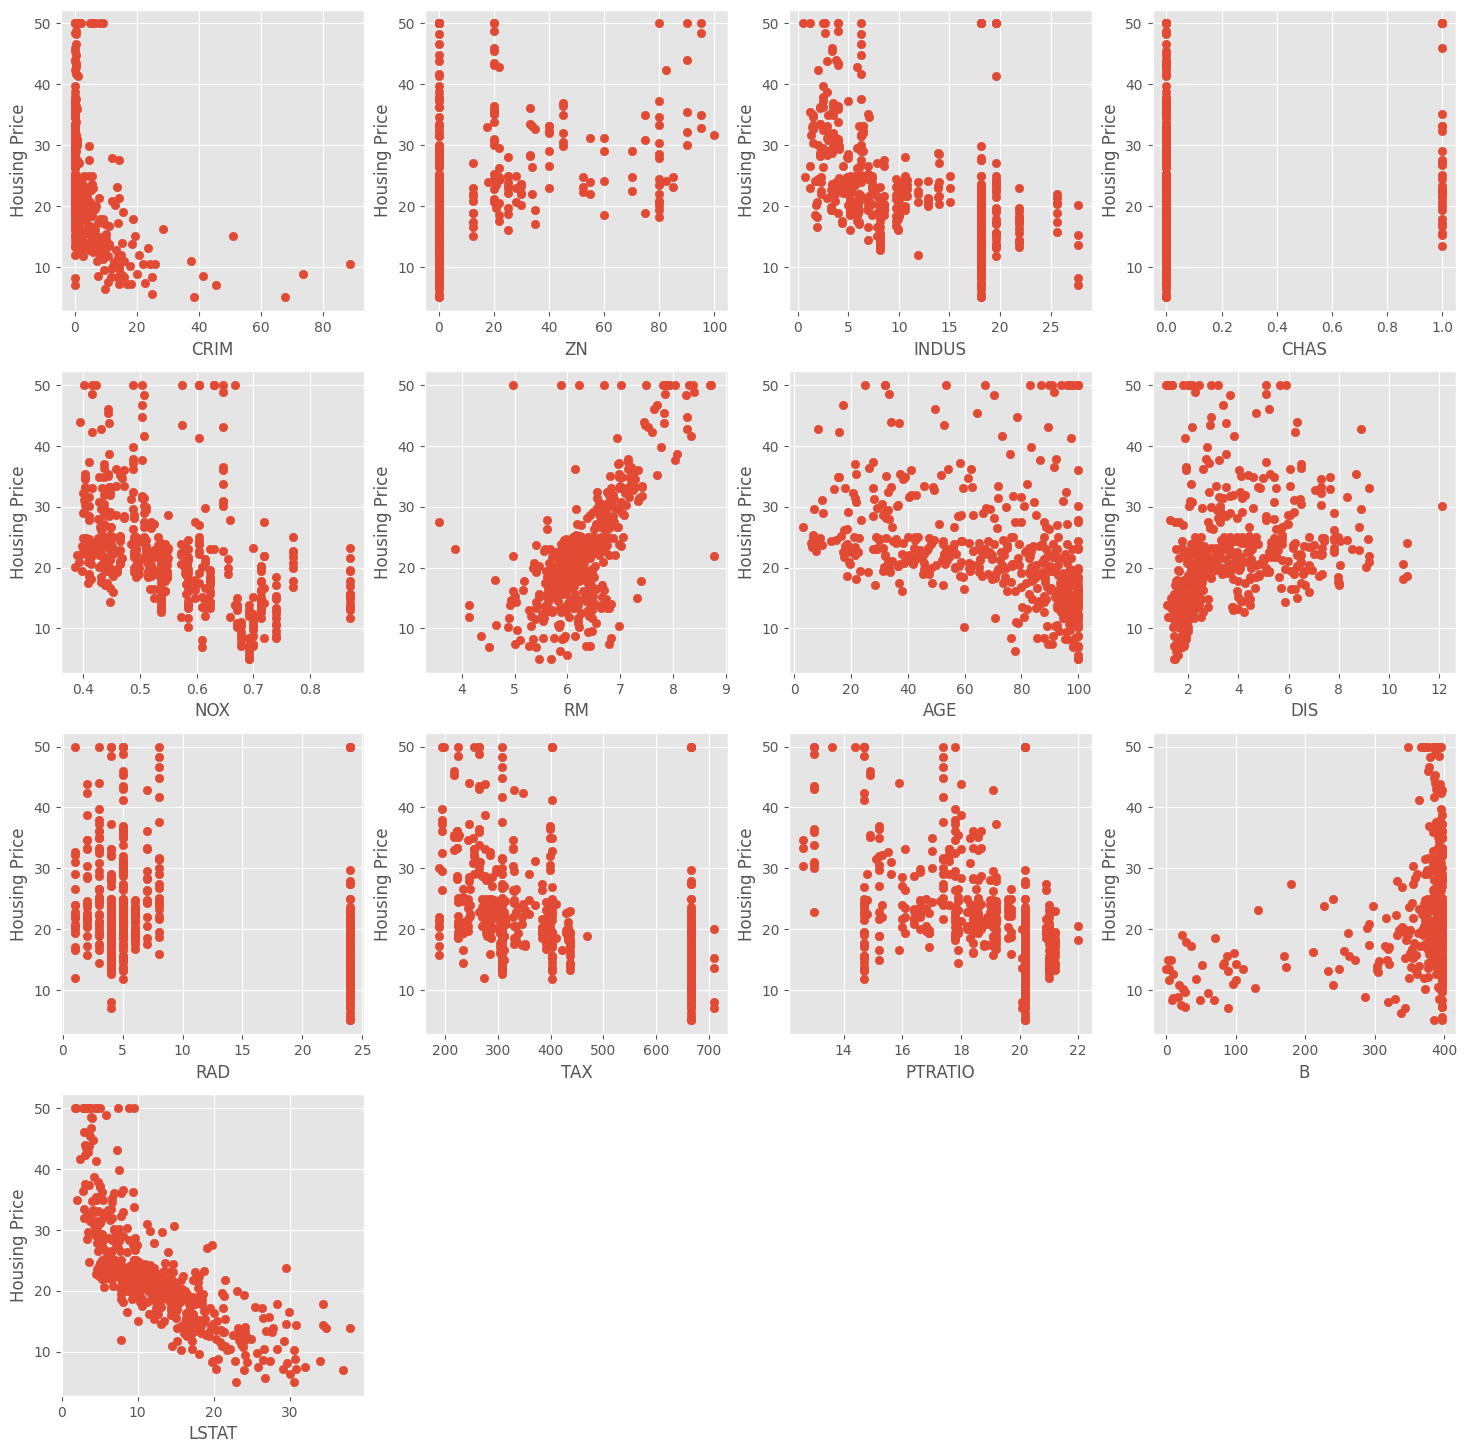

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,18))

for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4,4,index+1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('Housing Price', size=12)
    ax.set_xlabel(feature_name, size = 12)

boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

X = boston_pd.iloc[:,:-1]
y = boston_pd.iloc[:, -1]

print(boston_pd.head())

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.25, random_state = 42)

print("Train data shape of x = % s and y = % s" %(X_train.shape, y_train.shape))
print("Test data shape of x = % s and y = % s" %(X_test.shape, y_test.shape))

Una vez tenemos hecho el análisis y la limpieza de los datos, realizamos el preprocesado de los datos y podemos empezar con la regularización.

Empezamos con la Regresión L1 (Lasso) 🏀

1) Importamos la clase Lasso desde la biblioteca scikit-learn:

In [3]:
from sklearn.linear_model import Lasso

2) Creamos un objeto Lasso y establecemos el valor de alpha en 1:

In [4]:
lasso = Lasso(alpha = 1)

3) Entrenamos el modelo en los datos de entrenamiento (X_train e y_train):

In [5]:
lasso.fit(X_train, y_train)

Lasso(alpha=1)

4) Hacemos las predicciones en los datos de prueba (¡Recordemos que solo en X-test!):

In [6]:
y_pred = lasso.predict(X_test)

5) Calculamos el error cuadrático medio (MSE) entre las predicciones (y_pred) y los valores reales (y_test), y lo sacamos por pantalla:

In [7]:
mean_squared_error_lasso = np.mean((y_pred - y_test)**2)
print(mean_squared_error_lasso)

24.390752590355167


6) Almacenamos los coeficientes en un DataFrame y los sacamos por pantalla:

In [8]:
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = X_train.columns
lasso_coefficient["Coefficient Estimate"] = lasso.coef_
print(lasso_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.083898
1        ZN              0.026461
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.545450
6       AGE              0.013458
7       DIS             -0.582829
8       RAD              0.207381
9       TAX             -0.011213
10  PTRATIO             -0.705006
11        B              0.011988
12    LSTAT             -0.757837


7) Sacamos por pantalla los coeficientes y el intercepto para ver su valor:

In [9]:
print("Coeficientes:", lasso.coef_)
print("Interceptor:", lasso.intercept_)

Coeficientes: [-0.0838981   0.02646051 -0.          0.         -0.          1.54544951
  0.01345772 -0.58282853  0.20738089 -0.01121302 -0.70500625  0.01198848
 -0.75783702]
Interceptor: 35.0437863357298


8) Graficamos los coeficientes en una gráfica de barras: 
    
    Cada barra representa una variable de entrada y su altura representa el valor del coeficiente correspondiente.

    El eje X representa las variables de entrada y el eje Y representa el valor del coeficiente. Los coeficientes positivos indican que un aumento en la variable de entrada aumentará la variable objetivo, mientras que los coeficientes negativos indican que un aumento en la variable de entrada disminuirá la variable objetivo.

    En la gráfica, el color de cada barra puede ser diferente y establecido por el parámetro "color".

    La posición de los ejes está establecida por las líneas ax.spines['bottom'].set_position('zero') y ax.set_ylim([-18, 4]). La primera línea establece la posición del eje inferior en cero, mientras que la segunda línea establece el rango de valores para el eje Y entre -18 y 4.

    Finalmente, el estilo de la gráfica está establecido por la línea plt.style.use('ggplot'). Esto aplica un estilo de gráfica específico a la gráfica.

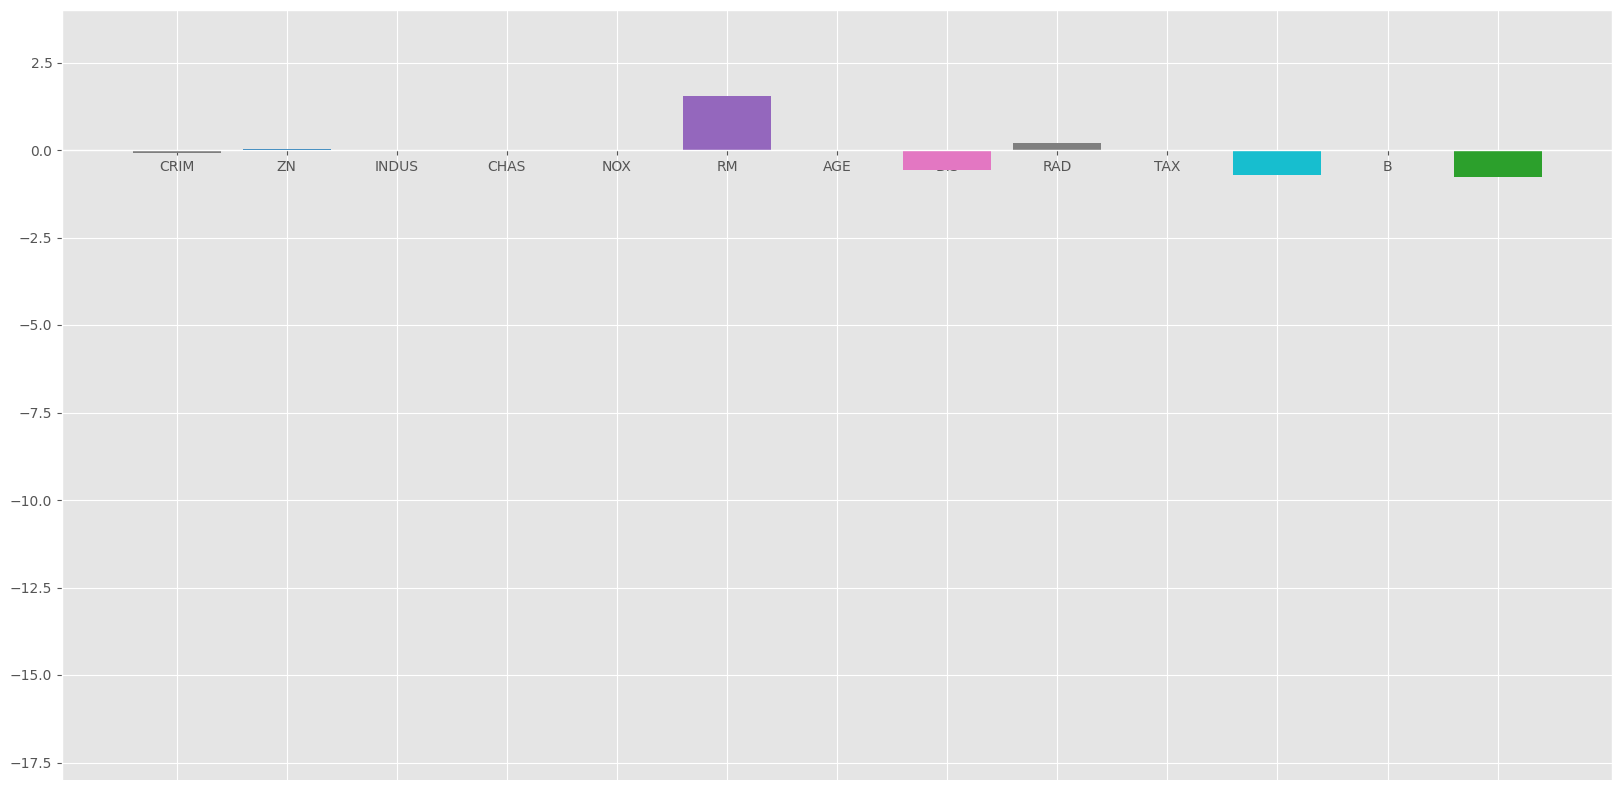

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(lasso_coefficient["Columns"],
       lasso_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot');

#

Ahora vamos a hacerlo con una regresión L2 (Ridge) 🌊

1) Importamos la clase Ridge desde la biblioteca scikit-learn:

In [11]:
from sklearn.linear_model import Ridge

2) Creamos un objeto Ridge y establecemos el valor de alpha en 1: 

In [12]:
ridgeR = Ridge(alpha = 1)

3) Entrenamos el modelo en los datos de entrenamiento (X_train e y_train):

In [13]:
ridgeR.fit(X_train, y_train)

Ridge(alpha=1)

4) Hacemos las predicciones en los datos de prueba (¡Recordemos que solo en X-test!):

In [14]:
y_pred = ridgeR.predict(X_test)

5) Calculamos el error cuadrático medio (MSE) entre las predicciones (y_pred) y los valores reales (y_test), y lo sacamos por pantalla:

In [15]:
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

22.480475501233883


6) Almacenamos los coeficientes en un DataFrame y los sacamos por pantalla:

In [16]:
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = X_train.columns
ridge_coefficient["Coefficient Estimate"] = ridgeR.coef_
print(ridge_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.123830
1        ZN              0.031392
2     INDUS              0.017677
3      CHAS              2.542772
4       NOX             -8.772492
5        RM              4.379802
6       AGE             -0.015373
7       DIS             -1.290861
8       RAD              0.244068
9       TAX             -0.010824
10  PTRATIO             -0.833466
11        B              0.013486
12    LSTAT             -0.534354


7) Sacamos por pantalla los coeficientes y el intercepto para ver su valor:

In [17]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
Interceptor: 24.878370472969404


8) Graficamos los coeficientes en una gráfica de barras: 

    Cada barra representa una variable de entrada y su altura representa el valor del coeficiente correspondiente.

    El eje X representa las variables de entrada y el eje Y representa el valor del coeficiente. Los coeficientes positivos indican que un aumento en la variable de entrada aumentará la variable objetivo, mientras que los coeficientes negativos indican que un aumento en la variable de entrada disminuirá la variable objetivo.

    En la gráfica, el color de cada barra puede ser diferente y establecido por el parámetro "color".

    La posición de los ejes está establecida por las líneas ax.spines['bottom'].set_position('zero') y ax.set_ylim([-18, 4]). La primera línea establece la posición del eje inferior en cero, mientras que la segunda línea establece el rango de valores para el eje Y entre -18 y 4.

    Finalmente, el estilo de la gráfica está establecido por la línea plt.style.use('ggplot'). Esto aplica un estilo de gráfica específico a la gráfica.

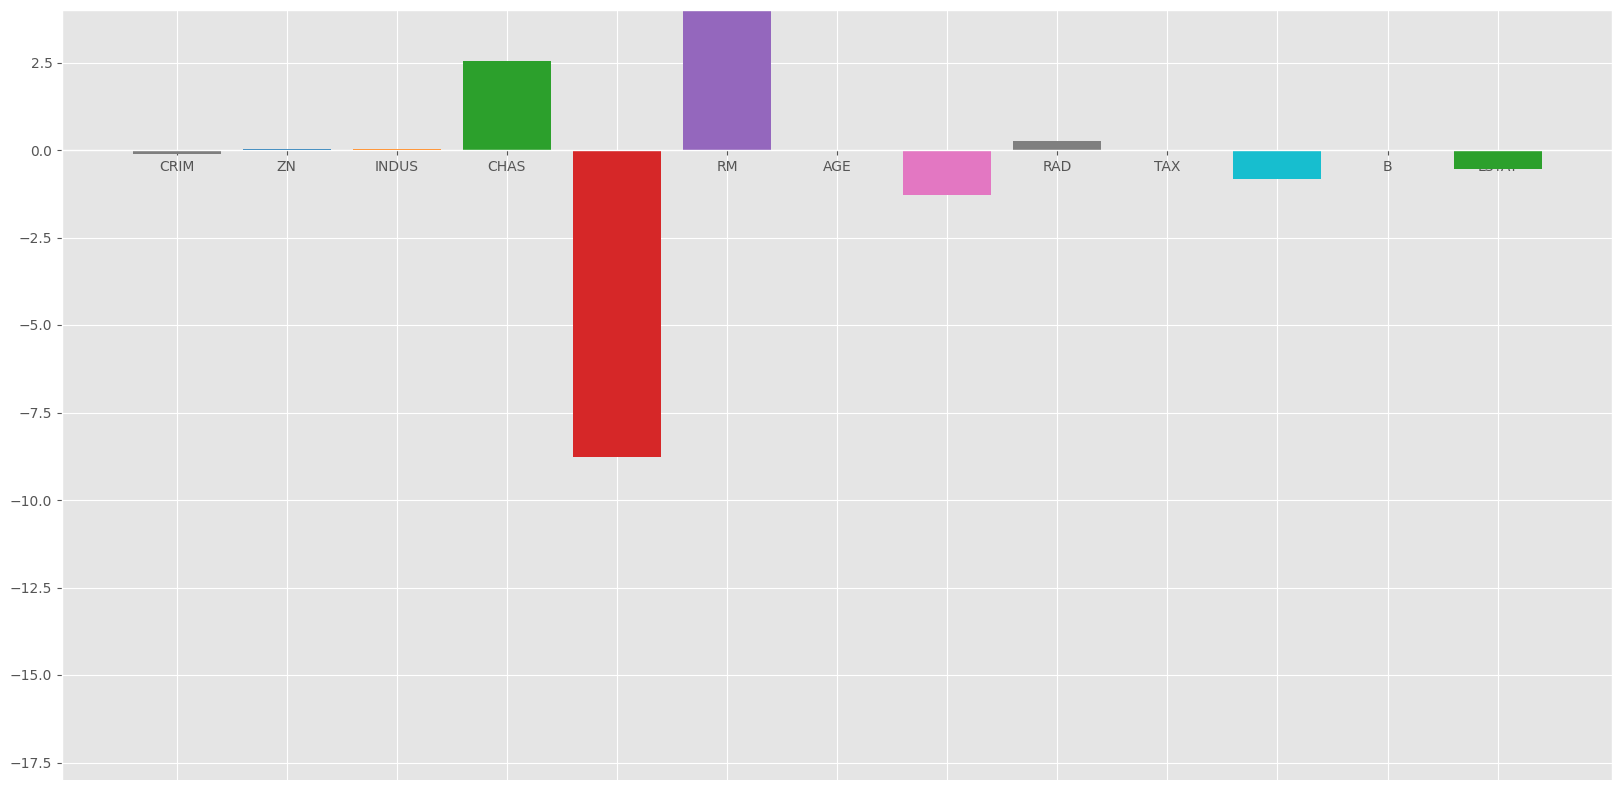

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(ridge_coefficient["Columns"],
       ridge_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot');

**Si nos fijamos, siempre es el mismo procedimiento, lo unico que varía es si utilizamos una regresión L1 o L2** (Por si a alguien le sirve de consuelo 😔)

Vamos ahora a combinar ambas regresiones creando un Elastic Net 🥅

1) Importamos el modelo de regularización Elastic Net de la librería scikit-learn: 

In [19]:
from sklearn.linear_model import ElasticNet

2) Creamos un objeto de Elastic Net con un parámetro l1_ratio especificado (que controla la proporción de la penalización L1 y L2 en la función de penalización combinada). En este caso el l1_ratio especificado es 0.9:

In [20]:
e_net = ElasticNet(l1_ratio = 0.9)

3) Entrenamos el modelo con los datos de entrenamiento X_train y y_train usando el método fit:

In [21]:
e_net.fit(X_train, y_train)

ElasticNet(l1_ratio=0.9)

4) Hacemos la predicción con los datos de prueba X_test y se almacenan en y_pred: 

In [22]:
y_pred = e_net.predict(X_test)

5) Calculamos el error cuadrático medio (MSE) entre las predicciones y los datos reales de prueba y_test:

In [23]:
mean_squared_error_e = np.mean((y_pred - y_test)**2)
print(mean_squared_error_e)

24.343817991716637


6) Creamos un dataframe enet_coefficient que contiene las columnas de las variables de entrada y los coeficientes estimados y lo imprimimos por pantalla:

In [24]:
enet_coefficient = pd.DataFrame()
enet_coefficient["Columns"] = X_train.columns
enet_coefficient["Coefficient Estimate"] = e_net.coef_
print(enet_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.087992
1        ZN              0.028729
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.378834
6       AGE              0.013873
7       DIS             -0.616030
8       RAD              0.222633
9       TAX             -0.011868
10  PTRATIO             -0.716514
11        B              0.011961
12    LSTAT             -0.768984


7) Imprimimos los coeficientes y el intercepto del modelo:

In [25]:
print("Coeficientes:", e_net.coef_)
print("Interceptor:", e_net.intercept_)

Coeficientes: [-0.08799226  0.02872877 -0.          0.         -0.          1.37883439
  0.01387315 -0.61602985  0.2226327  -0.01186811 -0.71651394  0.01196065
 -0.76898432]
Interceptor: 36.66388800400621


8) Graficamos los coeficientes en una gráfica de barras: 

    Con fig, ax = plt.subplots creamos una figura y un eje con un tamaño específico de 20x10.

    Se definen una lista de colores 'color' que se usará para representar cada barra en la gráfica.

    Con ax.bar creamos una gráfica utilizando la función bar del eje ax, que representa los coeficientes estimados para cada variable. Se especifican los nombres de las columnas como las etiquetas de los ejes x, los coeficientes estimados como los valores en el eje y, y los colores que se definieron anteriormente para cada barra.

    Con ax.spines configuramos la posición del borde inferior del eje y para que esté en cero usando la función set_position.

    Configuramos un estilo específico llamado ggplot para la gráfica utilizando la función 'use'.

    Y mostramos la gráfica.

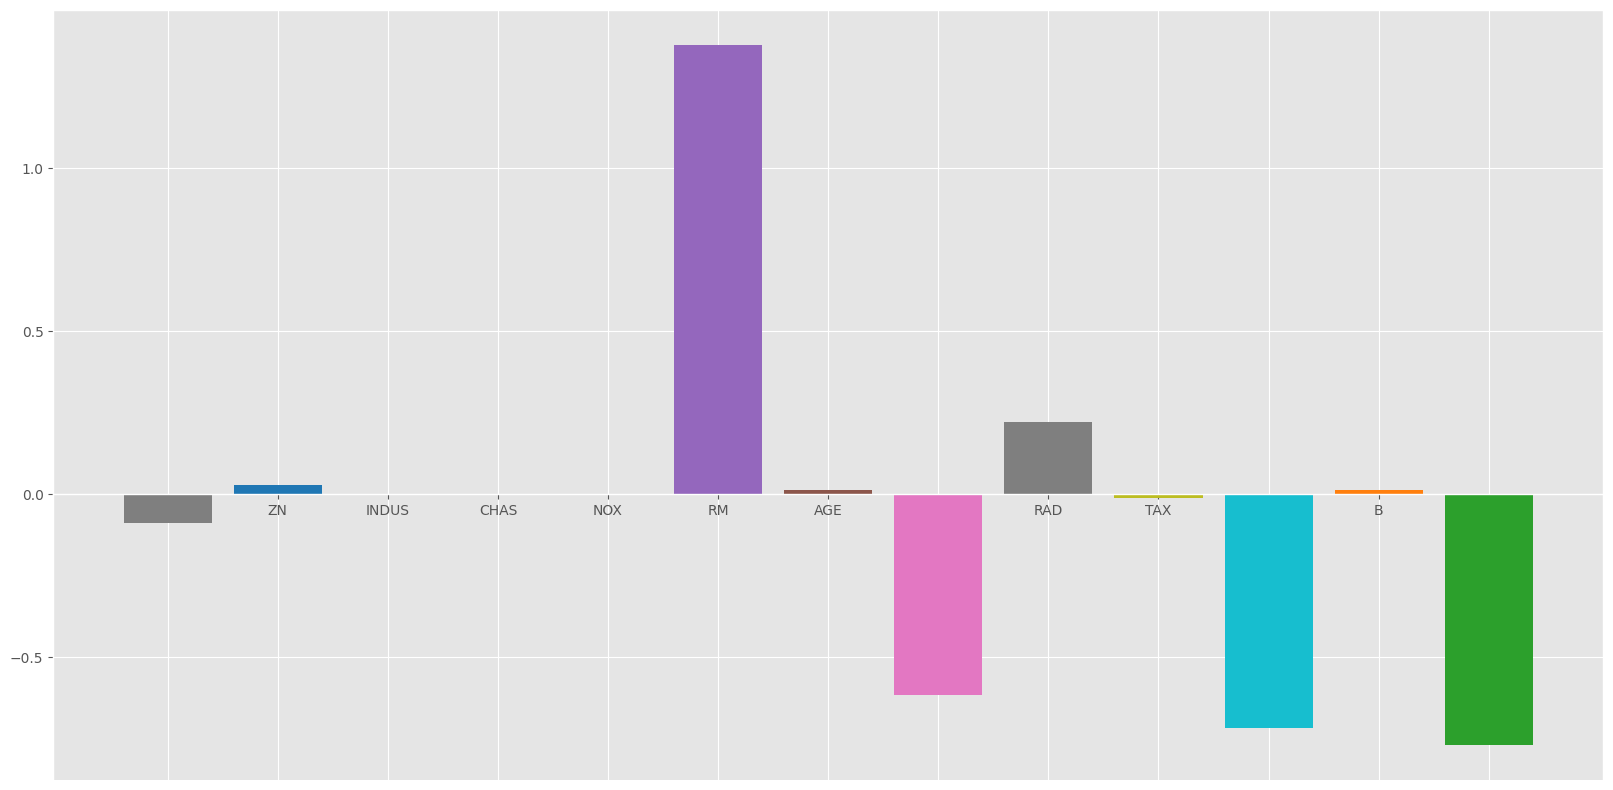

In [26]:
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(enet_coefficient["Columns"],
       enet_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot');

9) Realizamos una 'búsqueda de rejilla' (Grid Search) para encontrar los mejores valores de los parámetros alpha y l1_ratio para el modelo Elastic Net: Para ello, importaremos el módulo de GridSearchCV de scikit-learn:

In [27]:
from sklearn.model_selection import GridSearchCV

10) Creamos un objeto de Elastic Net:

In [28]:
model = ElasticNet()

11) Creamos una rejilla (grid) como un diccionario vacío que llenaremos con valores para alpha y l1_ratio con Cross Validation: 

In [29]:
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
grid['l1_ratio'] = np.arange(0.01,0.1, 1)

12) Creamos un objeto de GridSearchCV con el modelo, la rejilla y la puntuación de error cuadrático medio negativo:

In [30]:
search = GridSearchCV(model, grid, scoring = "neg_mean_squared_error", cv = 10, n_jobs = -1)

13) Realizamos la búsqueda con los datos de entrenamiento (Recordamos, X_train e y_train) y lo guardamos en la variable 'results':

In [31]:
results = search.fit(X_train, y_train)

14) Imprimimos el error cuadrático medio negativo mínimo y la configuración de los parámetros óptimos:

In [32]:
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -24.368
Config: {'alpha': 1e-05, 'l1_ratio': 0.01}


15) Sacamos el mejor estimador resultante de la búsqueda de rejilla:

In [33]:
results.best_estimator_

ElasticNet(alpha=1e-05, l1_ratio=0.01)

16) Podemos sacar en un diccionario de forma detallada todos los resultados que se han realizado en el cross validation de la busqueda de rejilla con cv_results_:

In [34]:
results.cv_results_

{'mean_fit_time': array([0.00417669, 0.00319874, 0.00267758, 0.00327163, 0.00086265,
        0.00165725, 0.00254669, 0.00253189]),
 'std_fit_time': array([0.00420636, 0.00391764, 0.00370246, 0.00401172, 0.00238759,
        0.00331682, 0.0038948 , 0.00387895]),
 'mean_score_time': array([0.00407612, 0.00159957, 0.00341692, 0.00089784, 0.00166779,
        0.00160317, 0.00087349, 0.00086081]),
 'std_score_time': array([0.00408104, 0.00319915, 0.00419883, 0.00265025, 0.0033392 ,
        0.00320635, 0.00262048, 0.002445  ]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_l1_ratio': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-05, 'l1_ratio': 0.01},


# Saquemos algunas conclusiones 🔚:

1) La regularización se utiliza para reducir la dependencia de cualquier variable independiente en particular agregando un término de penalización a la función de pérdida. Este término evita que los coeficientes de las variables independientes tomen valores extremos. 

2) **La regresión de Lasso (L1)** agrega un término de penalización de regularización L1 a la función de pérdida, lo que reduce los coeficientes y los hace 0, eliminando así la variable independiente correspondiente. Puede usarse para la selección de características, etc. 

3) **La regresión de Ridge (L2)** agrega un término de penalización de regularización L2 a la función de pérdida, lo que reduce los coeficientes pero no los hace 0 y, por lo tanto, no elimina completamente ninguna variable independiente. Puede usarse para medir el impacto de las diferentes variables independientes. 

4) **El Elastic Net** es una combinación de ambas regularizaciones. Contiene tanto L1 como L2 como sus términos de penalización. Funciona mejor que la regresión de Ridge y Lasso en la mayoría de los casos de prueba.

5) Haciendo un **analisis de rejilla (GridSearchCV)** podemos ver los valores óptimos de los parametros alpha y l1_ratio.